# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Chapter-5" data-toc-modified-id="Chapter-5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 5</a></div><div class="lev2 toc-item"><a href="#5E1." data-toc-modified-id="5E1.-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>5E1.</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5E2." data-toc-modified-id="5E2.-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>5E2.</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5E3" data-toc-modified-id="5E3-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>5E3</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5E4" data-toc-modified-id="5E4-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>5E4</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#5M1" data-toc-modified-id="5M1-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>5M1</a></div><div class="lev3 toc-item"><a href="#Ans" data-toc-modified-id="Ans-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev4 toc-item"><a href="#Spurious-correlated-data,-by-itself,-contains-a-lot-of-information-about-our-variable-of-interest" data-toc-modified-id="Spurious-correlated-data,-by-itself,-contains-a-lot-of-information-about-our-variable-of-interest-1511"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Spurious correlated data, by itself, contains a lot of information about our variable of interest</a></div><div class="lev4 toc-item"><a href="#When-the-cause-is-included,-the-effect-of-the-spurious-data-on-our-dependent-variable-shrinks,-while-the-effect-of-the-cause-is-strengthened." data-toc-modified-id="When-the-cause-is-included,-the-effect-of-the-spurious-data-on-our-dependent-variable-shrinks,-while-the-effect-of-the-cause-is-strengthened.-1512"><span class="toc-item-num">1.5.1.2&nbsp;&nbsp;</span>When the cause is included, the effect of the spurious data on our dependent variable shrinks, while the effect of the cause is strengthened.</a></div><div class="lev2 toc-item"><a href="#5M2." data-toc-modified-id="5M2.-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>5M2.</a></div>

In [9]:
import pandas as pd
import numpy as np
import pymc3 as pm
%matplotlib inline

# Chapter 5

## 5E1. 

Which of the linear models below are multiple linear regressions?

(1) $\mu_i = \alpha + \beta x_i$

(2) $\mu_i = \beta_x x_i + \beta_z x_z$

(3) $\mu_i = \alpha + \beta(x_i-z_i)$

(4) $\mu_i = \alpha + \beta_x x_i + \beta_z z_i$

### Ans

(1) is univariate since it's only using one variable $x_i$.

(2) is multivariate because it's using $x_i$ and $x_z$.

(3) is weird in that it's using two predictor variables $x_i$ and $z_i$ but there's only one beta coefficient. This is probably a case of negative multicollinearity between the two predictor variables (i.e. $x_i$ and $z_i$ are strongly negatively correlated: so if $x_i$ is high, then $z_i$ is low, vice versa). Including $z_i$ after we've included $x_i$ does not give us new information, so even though it's technically using two variables, we're really only estimating one, so I think this could be argued as if it's univariate regression.

(4) is definitely a multiple linear regression.

## 5E2. 

Write down a multiple regression to evaluate the claim: _Animal diversity is linearly related to latitude, but only after controlling for plant diversity_. You just need to write down the model definition.

### Ans

$$
\begin{equation}
\begin{aligned}
a_i &\sim \alpha + \beta_l l_i + \beta_p p_i + \beta_{lp} l_i p_i \\
a_i &\sim \alpha + \beta_p p_i + \beta_{lp} l_i p_i & \text{latitude by itself has no effect}
\end{aligned}
\end{equation}
$$

## 5E3

Write down a multiple regression to evaluate the claim: _Neither amount of funding nor size of laboratory is by itself a good predictor of time to PhD degree; but together these variables are both positively associated with time to degree._ Write down the model definition and indicate which side of zero each slope parameter should be on.

### Ans

$$
\begin{equation}
\begin{aligned}
    t_i &\sim \alpha + \beta_s s_i + \beta_f f_i
\end{aligned}
\end{equation}
$$

Since we think that they are both positively correlated with time to degree when accounting for both, we expect that $\beta_s$ and $\beta_f$ are above 0.

## 5E4

Suppose you have a single categorical predictor with 4 levels (unique values), labeled A, B, C, and D. Let $A_i$ be an indicator variable that is 1 where case $i$ is in category $A$. Also suppose $B_i$, $C_i$, and $D_i$ for the other categories. Now which of the following linear models are inferentially equivalent ways to include the categorical variable in a regression? Models are inferentially equivalent when it's possible to compute one posterior distribution from the posterior distribution of another model.

(1) $ \mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_D D_i$

(2) $ \mu_i = \alpha + \beta_A A_i + \beta_B B_i + \beta_C C_i+ \beta_D D_i$

(3) $ \mu_i = \alpha + \beta_B B_i + \beta_C C_i+ \beta_D D_i$

(4) $ \mu_i = \alpha_A A_i + \alpha + \alpha_B B_i + \alpha_C C_i+ \alpha_D D $

(5) $ \mu_i = \alpha_A(1-B_i-C_i-D_i) + \alpha_B B_i + \alpha_C C_i + \alpha_D D_i$


### Ans

(1) $\alpha$ is the value of $C_i$ when $C_i$ is true. This is good.

(2) Adding $\beta_C C_i$ to (1) makes $\alpha$ redundant, so this is not inferentially equivalent.

(3) $\alpha$ is the value of $\mu_i$ when $A_i$ is true. This is inferentially equivalent to (1).

(4) is similar to (2), so not inferentially equivalent.

(5) no double-counting happens, so this is also inferentially equivalent.

## 5M1

Invent your own example of a spurious correlation. An outcome variable should be correlated with both predictor variables. But when both predictors are entered in the same model, the correlation between the outcome and one of the predictors should mostly vanish (or at least be greatly reduced).

### Ans

$$
\begin{equation}
\begin{aligned}
    a &\sim Normal(0,5) \\
    b &\sim Normal(a, 3) \\
    c &\sim Normal(a, 1) \\
\end{aligned}
\end{equation}
$$


In [31]:
cause_pred = np.random.normal(0, 5, 10000)
spurious_pred = np.random.normal(cause_pred, np.ones(10000) * 3)
c = np.random.normal(cause_pred, np.ones(10000))

In [32]:
with pm.Model() as spurious_5m1:
    beta_spurious = pm.Normal('beta_spurious', 0, 20)
    reg = beta_spurious * spurious_pred
    obs_c = pm.Normal('obs_c', reg, 6, observed=c)
    
    trace_spurious_5m1 = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▊| 10353/10500 [00:05<00:00, 1950.45it/s]/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.888150411111, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 10500/10500 [00:05<00:00, 1950.17it/s]


#### Spurious correlated data, by itself, contains a lot of information about our variable of interest

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2124d4e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c2134ce10>]], dtype=object)

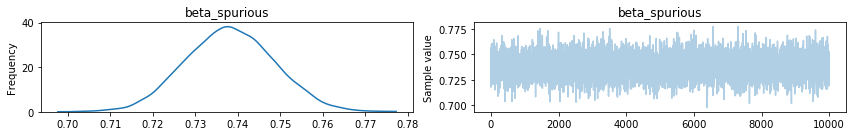

In [33]:
pm.traceplot(trace_spurious_5m1)

In [34]:
with pm.Model() as spurious_w_cause_5m1:
    beta_spurious = pm.Normal('beta_spurious', 0, 20)
    beta_cause = pm.Normal('beta_cause', 0, 10)
    reg = beta_spurious * spurious_pred + \
        beta_cause * cause_pred
    obs_c = pm.Normal('obs_c', reg, 6, observed=c)
    
    trace_spurious_w_cause_5m1 = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▉| 10413/10500 [00:12<00:00, 833.71it/s]/Users/eddericugaddan/anaconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.893296464224, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 10500/10500 [00:12<00:00, 833.93it/s]


#### When the cause is included, the effect of the spurious data on our dependent variable shrinks, while the effect of the cause is strengthened.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1fa37a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c20922828>]], dtype=object)

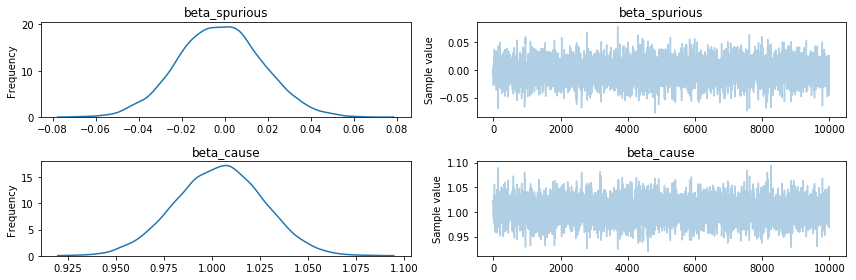

In [35]:
pm.traceplot(trace_spurious_w_cause_5m1)

## 5M2. 
Invent your own example of a masked relationship. An outcome variable should be correlated with both predictor variables, but in opposite directions. And the two predictor variables should be correlated with one another.